In [1]:
import cv2
import matplotlib.pyplot as plt

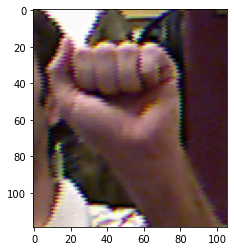

In [16]:
image=cv2.imread('D:\\Capstone utilities\\Datasets\\ASL_fingerspelling_dataset\\A\\a\\color_0_0002.png')
image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.imshow(image)

In [17]:
lb=(112,54,28)
ub=(255,219,172)
mask=cv2.inRange(image,lb,ub)
result=cv2.bitwise_and(image,image,mask=mask)
filtered_result=cv2.medianBlur(result,3)
cv2.imwrite('D:\\Capstone utilities\\Graphs\\Edge image\\masked_image.png',cv2.cvtColor(filtered_result, cv2.COLOR_BGR2RGB))

True

In [18]:
edge_result_canny=cv2.Canny(filtered_result,100,200)
cv2.imwrite('D:\\Capstone utilities\\Graphs\\Edge image\\edge_image.png',edge_result_canny)

True

In [20]:
brisk=cv2.BRISK_create()
kp,des=brisk.detectAndCompute(edge_result_canny,None)
mg=cv2.drawKeypoints(edge_result_canny, kp, None)
cv2.imwrite('D:\\Capstone utilities\\Graphs\\Edge image\\brisk_edge_image.png',mg)

True

In [2]:
image1=cv2.imread('D:\\Capstone utilities\\Graphs\\Edge image\\edge_image.png')
image1=cv2.cvtColor(image1,cv2.COLOR_BGR2RGB)

In [3]:
image2=cv2.rotate(image1,cv2.ROTATE_90_CLOCKWISE)

In [4]:
brisk=cv2.BRISK_create()
kp1,des1=brisk.detectAndCompute(image1,None)
kp2,des2=brisk.detectAndCompute(image2,None)

In [21]:
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

# Match descriptors.
matches = bf.match(des1,des2)

# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)

# Draw first 10 matches.

img3 = cv2.drawMatches(image1,kp1,image2,kp2,matches[:10],flags=2,outImg=image1)

cv2.imwrite('D:\\Capstone utilities\\Graphs\\Edge image\\brisk_keypoint_matching.png',img3)


True